In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models


DATA_DIR = '/kaggle/input/steel-data/data1/Train'

In [2]:
import os
print(os.listdir(DATA_DIR))

['Steel_Pa', 'Steel_In', 'Steel_Ps', 'Steel_Sc', 'steel_Cr', 'Steel_Rs']


In [3]:
train = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train'

In [4]:
test = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test'

In [5]:
# List all directories in the train directory
directories = os.listdir(train)

# Iterate over each directory and count the files
for directory in directories:
    # Construct full path to the directory
    dir_path = os.path.join(train, directory)
    # List all files in the directory
    files = os.listdir(dir_path)
    # Print the directory and the count of files
    print(f"{directory}: {len(files)} files")

Inclusion: 276 files
Rolled: 276 files
Pitted: 276 files
Scratches: 276 files
Patches: 276 files
Crazing: 276 files


In [6]:
import os
from PIL import Image
from torchvision import transforms
import torch

def calculate_mean_std(directory):
    transform_to_tensor = transforms.Compose([
        transforms.Grayscale(),   # Converts to grayscale if not already
        transforms.ToTensor()
    ])

    tensor_list = []

    # Walk through the directory structure
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', '.tif', '.tiff')):  # Expanded to include more image types
                file_path = os.path.join(root, file)
                try:
                    image = Image.open(file_path)
                    tensor_image = transform_to_tensor(image)
                    tensor_list.append(tensor_image)
                except Exception as e:
                    print(f"Failed to process {file_path}: {e}")

    if not tensor_list:
        raise RuntimeError("No images were loaded. Check the file paths and image files.")

    # Stack all tensors to create a single tensor
    all_tensors = torch.cat(tensor_list, dim=0)
    
    # Calculate mean and std
    mean = torch.mean(all_tensors)
    std = torch.std(all_tensors)

    return mean.item(), std.item()

# Replace 'path_to_train_directory' with the path to your train directory
try:
    mean, std = calculate_mean_std('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data')
    print(f"Mean: {mean}, Standard Deviation: {std}")
except RuntimeError as e:
    print(e)


Mean: 0.5031325221061707, Standard Deviation: 0.21237775683403015


In [7]:
from torchvision import transforms

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to a standard size
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(15),  # Randomly rotate images +-15 degrees
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5031], std=[0.2124])  # Normalize grayscale images using calculated mean and std
])
#alternate normalization stratergy
#transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

transform_valid = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to a standard size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5031], std=[0.2124])  # Normalize grayscale images using calculated mean and std
])


training_dataset = datasets.ImageFolder('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train', transform = transform_train)
#validation_dataset = datasets.ImageFolder('../input/steel-data/data1/Test/cal',transform = transform_valid)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=16, shuffle=True)
#validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=1, shuffle=False)

The NEU steel dataset is grayscale but has 3 channels. In the below code we convert it into grayscale and then visualize but we see that inclusion and crazing looks dark after the transforms.

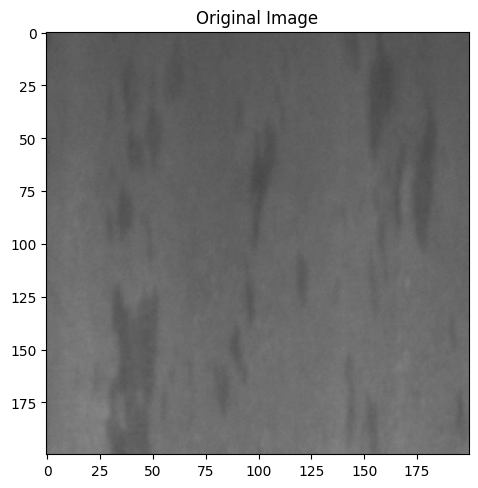

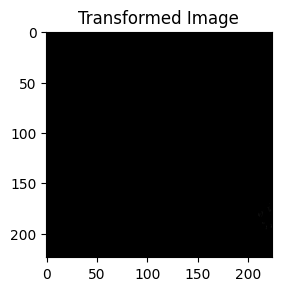

In [8]:


import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Path to your image file
image_path = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/valid/Inclusion/In_12.bmp'

# Define the transforms for visualization
to_tensor = transforms.ToTensor()  # This will be used to convert PIL images to tensors

# Transformation sequence for your actual data processing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to a standard size
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(15),  # Randomly rotate images +-15 degrees
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5031], std=[0.2124])  # Normalize grayscale images using calculated mean and std
])

# Load the image
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert the original image to tensor for consistent handling in imshow
tensor_image = to_tensor(image)

# Apply the transform to the image for the model
transformed_tensor_image = transform(image)

# Function to unnormalize and convert tensor to numpy for visualization
def imshow(tensor, title=None):
    # First clone the tensor to not do changes on the original
    image = tensor.clone().detach()
    image = image.numpy().squeeze()
    if image.shape[0] == 1:  # This checks if the image is normalized and has only one channel
        image = (image * 0.2124 + 0.5031)  # Unnormalize
    plt.imshow(image, cmap='gray', vmin=0, vmax=1)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
imshow(tensor_image, title='Original Image')
plt.subplot(1, 2, 2)
imshow(transformed_tensor_image[0], title='Transformed Image')  # Assuming grayscale and only one channel
plt.show()


In the below code we visualize the NEU steel dataset with RGB channels

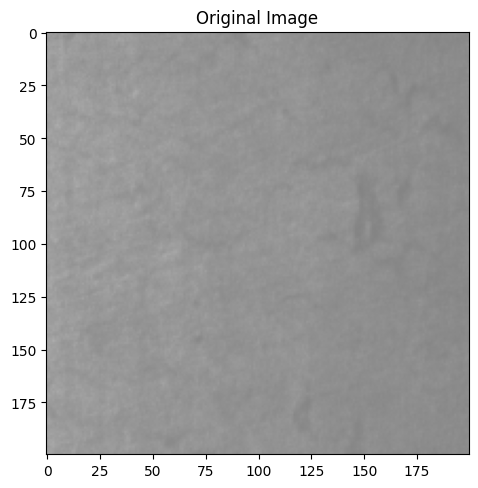

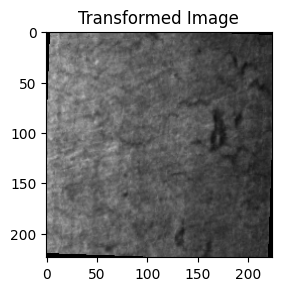

In [9]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Path to your image file
image_path = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/valid/Crazing/Cr_111.bmp'

# Define the transforms for visualization
to_tensor = transforms.ToTensor()  # This will be used to convert PIL images to tensors

# Transformation sequence for your actual data processing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to a standard size
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(15),  # Randomly rotate images +-15 degrees
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5031], std=[0.2124])  # Normalize RGB images
])

# Load the image and convert it to RGB
image = Image.open(image_path).convert('RGB')

# Convert the original image to tensor for consistent handling in imshow
tensor_image = to_tensor(image)

# Apply the transform to the image for the model
transformed_tensor_image = transform(image)

# Function to unnormalize and convert tensor to numpy for visualization
def imshow(tensor, title=None):
    image = tensor.clone().detach()
    image = image.permute(1, 2, 0).numpy()  # Rearrange dimensions to width x height x channels for matplotlib
    # Unnormalize using the mean and std
    mean = np.array([0.5031, 0.5031, 0.5031])
    std = np.array([0.2124, 0.2124, 0.2124])
    image = std * image + mean  # Unnormalize
    image = np.clip(image, 0, 1)  # Clip values to ensure they are between 0 and 1
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
imshow(tensor_image, title='Original Image')
plt.subplot(1, 2, 2)
imshow(transformed_tensor_image, title='Transformed Image')
plt.show()


In [10]:
validation_dataset = datasets.ImageFolder('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/valid',transform = transform_valid)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=8, shuffle=False)

In [11]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [12]:
img, label = validation_dataset[len(validation_dataset)-1]
print(img.shape, label)
img


torch.Size([3, 224, 224]) 5


tensor([[[ 1.7486,  1.7671,  2.1917,  ..., -0.0608, -0.0792, -0.1346],
         [ 1.9887,  2.1917,  2.3210,  ..., -0.0608, -0.0608, -0.1161],
         [ 2.2656,  2.3210,  2.3395,  ..., -0.0792, -0.0608, -0.0792],
         ...,
         [ 0.1423,  0.1608,  0.1423,  ...,  0.0870,  0.1239,  0.1608],
         [ 0.0870,  0.1423,  0.1608,  ...,  0.1239,  0.1239,  0.1423],
         [ 0.0870,  0.0870,  0.1054,  ...,  0.1423,  0.1423,  0.1977]],

        [[ 1.7486,  1.7671,  2.1917,  ..., -0.0608, -0.0792, -0.1346],
         [ 1.9887,  2.1917,  2.3210,  ..., -0.0608, -0.0608, -0.1161],
         [ 2.2656,  2.3210,  2.3395,  ..., -0.0792, -0.0608, -0.0792],
         ...,
         [ 0.1423,  0.1608,  0.1423,  ...,  0.0870,  0.1239,  0.1608],
         [ 0.0870,  0.1423,  0.1608,  ...,  0.1239,  0.1239,  0.1423],
         [ 0.0870,  0.0870,  0.1054,  ...,  0.1423,  0.1423,  0.1977]],

        [[ 1.7486,  1.7671,  2.1917,  ..., -0.0608, -0.0792, -0.1346],
         [ 1.9887,  2.1917,  2.3210,  ..., -0

In [13]:
print(training_dataset.classes)


['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [14]:
import matplotlib.pyplot as plt

def show_example(img, label):
    print('Label: ', validation_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Crazing (0)


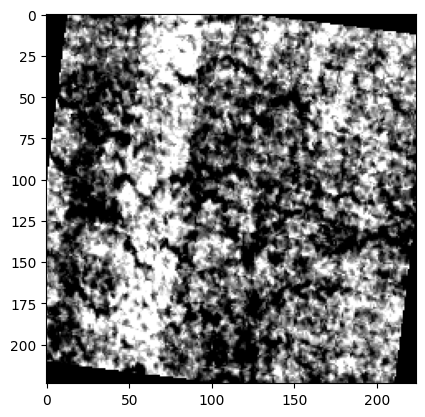

In [15]:
show_example(*training_dataset[len(validation_dataset)-1])

Label:  Patches (2)


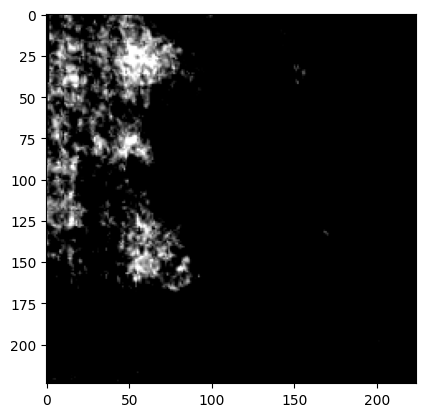

In [16]:
show_example(*training_dataset[555])


In [17]:
random_seed = 42
torch.manual_seed(random_seed);

The training and validation dataloader are called as training_loader and valication_loader

old code


from torch.utils.data import random_split
val_size = 50
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

In [18]:
from torch.utils.data.dataloader import DataLoader

batch_size=4

In [19]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(20, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=20).permute(1, 2, 0))
        break

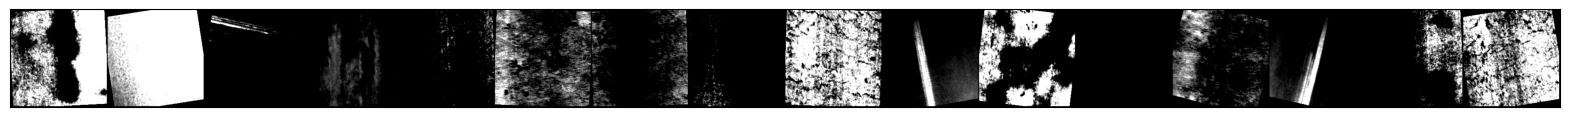

In [20]:
show_batch(training_loader)


In [21]:
# import torch
# import torchvision.models as models
# from torch import nn

# # Load the pretrained ResNet-50 model
# model = models.resnet50(pretrained=True)

# # Assume you have a number of classes specific to your dataset
# num_classes = 6  # Update this based on your dataset's specifics

# # Modify the final fully connected layer to match the number of classes
# model.fc = nn.Linear(model.fc.in_features, num_classes)


In [22]:
# for images, labels in training_loader:
#     print('images.shape:', images.shape)
#     out = model(images)
#     print('out.shape:', out.shape)
#     print(out)
#     break

In [23]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [24]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)



In [25]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

    @property
    def dataset(self):
        """Return the dataset of the wrapped dataloader"""
        return self.dl.dataset


In [26]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5031], std=[0.2124])
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet values
])


test_dir = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test'
test_dataset = ImageFolder(test_dir, transform=test_transforms)

from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)



In [27]:
device = get_default_device()
print(f"Using {device} for training.")

Using cuda for training.


In [28]:
import wandb



def train_epoch(model, device, training_loader, optimizer):
    model.train()
    total_train_loss = 0
    for images, labels in training_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        #wandb.log({"batch_train_loss": loss.item()})  # Log training loss per batch
    avg_train_loss = total_train_loss / len(training_loader)
    wandb.log({"train_loss": avg_train_loss})  # Log average training loss per epoch
    return avg_train_loss

@torch.no_grad()
def valid_epoch(model, device, validation_loader):
    model.eval()
    total_val_loss = 0
    total_correct = 0
    for images, labels in validation_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        total_val_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total_correct += torch.sum(preds == labels).item()
    avg_val_loss = total_val_loss / len(validation_loader)
    val_accuracy = total_correct / len(validation_loader.dataset)
    wandb.log({"Validation_loss": avg_val_loss, "Validation_accuracy": val_accuracy})  # Log validation metrics
    return avg_val_loss, val_accuracy


@torch.no_grad()
def test_model(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    accuracy = 100 * correct / total
    wandb.log({ "Test_accuracy": accuracy})  # Log validation metrics
    return accuracy


def train_eval_epoch(model,epochs,training_loader, validation_loader, test_loader, optimizer, device, model_name):
    # Initialize wandb

    history = []
    for epoch in range(epochs):
        train_loss = train_epoch(model, device, training_loader, optimizer)
        val_loss, val_accuracy = valid_epoch(model, device, validation_loader)
        test_accuracy = test_model(model, device, test_loader)  # Test the model


        print(f'Epoch [{epoch+1}/{epochs}]: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.2f}%')
        
        history.append({
            'train_loss': train_loss,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'test_accuracy': test_accuracy
        })

    return history

# Ensure test_loader is defined and properly set up before using it in this function





In [29]:
import torch.optim as optim

# Common settings for optimizer - this can be adjusted per model if needed
learning_rate = 0.001

def configure_optimizer(model, lr):
    return optim.Adam(model.parameters(), lr=lr)


garbage clear

In [30]:
import torch
import gc

def clear_pytorch_cache():
    """
    Frees up unused memory from PyTorch's caching allocator. It is also
    helpful in preventing memory leaks when tensors or models are deleted.
    """
    # Optional: Check if CUDA is available
    if torch.cuda.is_available():
        # Clear all cached memory for all CUDA devices
        torch.cuda.empty_cache()
    
    # Explicitly trigger garbage collection
    gc.collect()

In [31]:

import torch.nn as nn
num_classes = 6
import torch
import torch.nn as nn
import torchvision.models as models
import wandb
import gc

import torch.nn as nn

import torch.nn as nn

def modify_model(model, num_classes):
    if hasattr(model, 'fc'):
        # This is for models like ResNet or EfficientNet
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, num_classes)
    elif hasattr(model, 'classifier'):
        # This is necessary for models like VGG which use a Sequential classifier
        if isinstance(model.classifier, nn.Sequential):
            # Modify the last Linear layer (usually the last but one layer before the output)
            last_linear_layer = None
            for i in range(len(model.classifier)):
                if isinstance(model.classifier[i], nn.Linear):
                    last_linear_layer = model.classifier[i]
            if last_linear_layer is not None:
                in_features = last_linear_layer.in_features
                # Replace the last linear layer with a new one with the desired number of output classes
                model.classifier[-1] = nn.Linear(in_features, num_classes)
            else:
                raise NotImplementedError("No linear layer found in classifier to modify")
        else:
            raise TypeError("Classifier should be of type nn.Sequential")
    else:
        raise AttributeError("Model does not have 'fc' or 'classifier' attributes")
    return model





# Define model configurations
model_configs = {
    #'densenet121': lambda: models.densenet121(weights=models.DenseNet121_Weights.DEFAULT),
    #'squeezenet': lambda: models.squeezenet1_0(weights=models.SqueezeNet1_0_Weights.DEFAULT),
    'vgg16': lambda: models.vgg16(weights=models.VGG16_Weights.DEFAULT),
    'resnext50_32x4d': lambda: models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.DEFAULT),
    'mobilenet_v2': lambda: models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT),
    'efficientnet_b0': lambda: models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT),
    'resnet34': lambda: models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
}

# Function to clear the cache
def clear_pytorch_cache():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    gc.collect()

# Setup training configurations
num_classes = 6
epochs = 15
batch_size = 32
learning_rate = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example loop to train and evaluate each model
for model_name, model_constructor in model_configs.items():
    print(f"Training and evaluating {model_name}")
    model = model_constructor()  # Correctly call the lambda to instantiate the model
    model = modify_model(model, num_classes)
    model.to(device)  # Move model to the appropriate device
    # Define your optimizer here, ensure it's set up correctly
    optimizer = configure_optimizer(model, learning_rate)

    wandb.init(project="model_comparisons_2", entity="ashys2012", name=f"trial_{model_name}", config={
        "model_name": model_name,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "batch_size": batch_size
    })

    # Ensure the training function train_eval_epoch and other required functions are defined
    history = train_eval_epoch(model, wandb.config.epochs, training_loader, validation_loader, test_loader, optimizer, device, model_name)
    wandb.finish()
    clear_pytorch_cache()



Training and evaluating vgg16


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 179MB/s]  
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch [1/15]: Train Loss: 2.1010, Val Loss: 1.4193, Val Accuracy: 0.3472, Test Accuracy: 33.33%
Epoch [2/15]: Train Loss: 1.2183, Val Loss: 0.9261, Val Accuracy: 0.5694, Test Accuracy: 50.00%
Epoch [3/15]: Train Loss: 0.9759, Val Loss: 0.8205, Val Accuracy: 0.5694, Test Accuracy: 48.61%
Epoch [4/15]: Train Loss: 0.9992, Val Loss: 0.5615, Val Accuracy: 0.8194, Test Accuracy: 59.72%
Epoch [5/15]: Train Loss: 0.9428, Val Loss: 0.7107, Val Accuracy: 0.8056, Test Accuracy: 48.61%
Epoch [6/15]: Train Loss: 0.8978, Val Loss: 0.7501, Val Accuracy: 0.6667, Test Accuracy: 56.94%
Epoch [7/15]: Train Loss: 0.7717, Val Loss: 0.8067, Val Accuracy: 0.5417, Test Accuracy: 52.78%
Epoch [8/15]: Train Loss: 0.8068, Val Loss: 0.4718, Val Accuracy: 0.7500, Test Accuracy: 66.67%
Epoch [9/15]: Train Loss: 0.7170, Val Loss: 0.4836, Val Accuracy: 0.8194, Test Accuracy: 72.22%
Epoch [10/15]: Train Loss: 0.9075, Val Loss: 1.1875, Val Accuracy: 0.6389, Test Accuracy: 61.11%
Epoch [11/15]: Train Loss: 0.7286, Val 

Test_accuracy,▁▃▃▅▃▄▄▆▇▅█▆█▆▅
Validation_accuracy,▁▄▄▇▇▅▃▆▇▅█▆█▆▅
Validation_loss,█▅▄▃▄▄▄▂▃▇▂▃▁▃▄
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▂
Test_accuracy,62.5
Validation_accuracy,0.66667
Validation_loss,0.80694
train_loss,0.77536


Training and evaluating resnext50_32x4d


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-1a0047aa.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-1a0047aa.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 173MB/s]
wandb: Currently logged in as: ashys2012. Use `wandb login --relogin` to force relogin


Epoch [1/15]: Train Loss: 0.4087, Val Loss: 0.0612, Val Accuracy: 0.9861, Test Accuracy: 98.61%
Epoch [2/15]: Train Loss: 0.3204, Val Loss: 0.0042, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [3/15]: Train Loss: 0.1397, Val Loss: 0.0127, Val Accuracy: 1.0000, Test Accuracy: 98.61%
Epoch [4/15]: Train Loss: 0.0620, Val Loss: 0.0024, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [5/15]: Train Loss: 0.0608, Val Loss: 0.0020, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [6/15]: Train Loss: 0.0781, Val Loss: 0.0034, Val Accuracy: 1.0000, Test Accuracy: 98.61%
Epoch [7/15]: Train Loss: 0.0654, Val Loss: 0.0011, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [8/15]: Train Loss: 0.0831, Val Loss: 0.0059, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [9/15]: Train Loss: 0.0611, Val Loss: 0.1051, Val Accuracy: 0.9861, Test Accuracy: 93.06%
Epoch [10/15]: Train Loss: 0.0348, Val Loss: 0.0004, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [11/15]: Train Loss: 0.0548

Test_accuracy,▇█▇██▇██▁██████
Validation_accuracy,▁███████▁████▁█
Validation_loss,▅▁▂▁▁▁▁▁█▁▁▁▁▂▁
train_loss,█▆▃▂▂▂▂▂▂▁▂▂▁▂▁
Test_accuracy,100.0
Validation_accuracy,1.0
Validation_loss,8e-05
train_loss,0.01478


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


Training and evaluating mobilenet_v2


100%|██████████| 13.6M/13.6M [00:00<00:00, 97.3MB/s]


Epoch [1/15]: Train Loss: 0.3501, Val Loss: 0.0580, Val Accuracy: 0.9861, Test Accuracy: 98.61%
Epoch [2/15]: Train Loss: 0.1934, Val Loss: 0.0247, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [3/15]: Train Loss: 0.0931, Val Loss: 0.0003, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [4/15]: Train Loss: 0.1231, Val Loss: 0.0011, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [5/15]: Train Loss: 0.0631, Val Loss: 0.0009, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [6/15]: Train Loss: 0.0497, Val Loss: 0.2083, Val Accuracy: 0.9306, Test Accuracy: 87.50%
Epoch [7/15]: Train Loss: 0.0707, Val Loss: 0.0040, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [8/15]: Train Loss: 0.0326, Val Loss: 0.0013, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [9/15]: Train Loss: 0.0420, Val Loss: 0.0025, Val Accuracy: 1.0000, Test Accuracy: 98.61%
Epoch [10/15]: Train Loss: 0.0454, Val Loss: 0.7249, Val Accuracy: 0.8472, Test Accuracy: 83.33%
Epoch [11/15]: Train Loss: 0.0744

Test_accuracy,▇████▃██▇▁█████
Validation_accuracy,▇████▅███▁█████
Validation_loss,▂▁▁▁▁▃▁▁▁█▁▁▁▁▁
train_loss,█▅▂▃▂▁▂▁▁▁▂▂▁▁▁
Test_accuracy,100.0
Validation_accuracy,1.0
Validation_loss,6e-05
train_loss,0.02712


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


Training and evaluating efficientnet_b0


100%|██████████| 20.5M/20.5M [00:00<00:00, 157MB/s]


Epoch [1/15]: Train Loss: 0.3000, Val Loss: 0.0059, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [2/15]: Train Loss: 0.1489, Val Loss: 0.0081, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [3/15]: Train Loss: 0.1302, Val Loss: 0.0159, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [4/15]: Train Loss: 0.0879, Val Loss: 0.0013, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [5/15]: Train Loss: 0.0536, Val Loss: 0.0001, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [6/15]: Train Loss: 0.0448, Val Loss: 0.0001, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [7/15]: Train Loss: 0.0659, Val Loss: 0.0001, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [8/15]: Train Loss: 0.0247, Val Loss: 0.0067, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [9/15]: Train Loss: 0.0805, Val Loss: 2.0375, Val Accuracy: 0.8333, Test Accuracy: 80.56%
Epoch [10/15]: Train Loss: 0.1024, Val Loss: 0.0236, Val Accuracy: 0.9861, Test Accuracy: 98.61%
Epoch [11/15]: Train Loss: 0.04

Test_accuracy,████████▁██████
Validation_accuracy,████████▁▇█████
Validation_loss,▁▁▁▁▁▁▁▁█▁▁▁▁▁▁
train_loss,█▄▄▃▂▂▂▁▃▃▂▁▂▁▁
Test_accuracy,100.0
Validation_accuracy,1.0
Validation_loss,0.00041
train_loss,0.01686


Training and evaluating resnet34


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 155MB/s] 


Epoch [1/15]: Train Loss: 0.7293, Val Loss: 1.1736, Val Accuracy: 0.7917, Test Accuracy: 88.89%
Epoch [2/15]: Train Loss: 0.3859, Val Loss: 0.0299, Val Accuracy: 1.0000, Test Accuracy: 93.06%
Epoch [3/15]: Train Loss: 0.2565, Val Loss: 0.2285, Val Accuracy: 0.9028, Test Accuracy: 87.50%
Epoch [4/15]: Train Loss: 0.2106, Val Loss: 0.8209, Val Accuracy: 0.7500, Test Accuracy: 80.56%
Epoch [5/15]: Train Loss: 0.1986, Val Loss: 0.2386, Val Accuracy: 0.9306, Test Accuracy: 97.22%
Epoch [6/15]: Train Loss: 0.1083, Val Loss: 0.0459, Val Accuracy: 0.9722, Test Accuracy: 94.44%
Epoch [7/15]: Train Loss: 0.1612, Val Loss: 0.0361, Val Accuracy: 1.0000, Test Accuracy: 95.83%
Epoch [8/15]: Train Loss: 0.0807, Val Loss: 0.0009, Val Accuracy: 1.0000, Test Accuracy: 98.61%
Epoch [9/15]: Train Loss: 0.1366, Val Loss: 0.0377, Val Accuracy: 0.9861, Test Accuracy: 100.00%
Epoch [10/15]: Train Loss: 0.1380, Val Loss: 0.0093, Val Accuracy: 1.0000, Test Accuracy: 100.00%
Epoch [11/15]: Train Loss: 0.1155, Va

Test_accuracy,▄▆▃▁▇▆▇███▇█▅█▇
Validation_accuracy,▂█▅▁▆▇████▇████
Validation_loss,█▁▂▆▂▁▁▁▁▁▁▁▁▁▁
train_loss,█▅▃▃▃▂▂▁▂▂▂▁▂▂▁
Test_accuracy,95.83333
Validation_accuracy,1.0
Validation_loss,0.00065
train_loss,0.04251


In [32]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

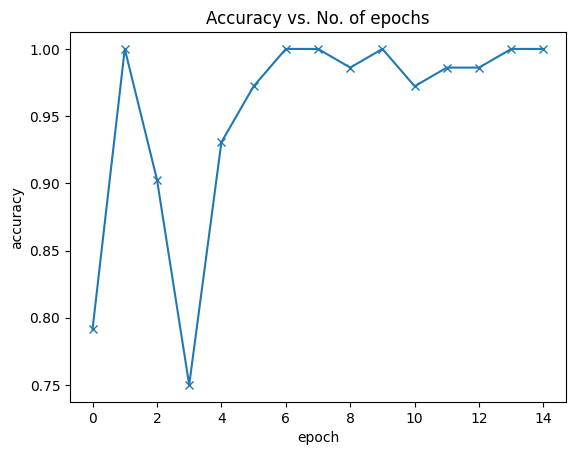

In [33]:
plot_accuracies(history)


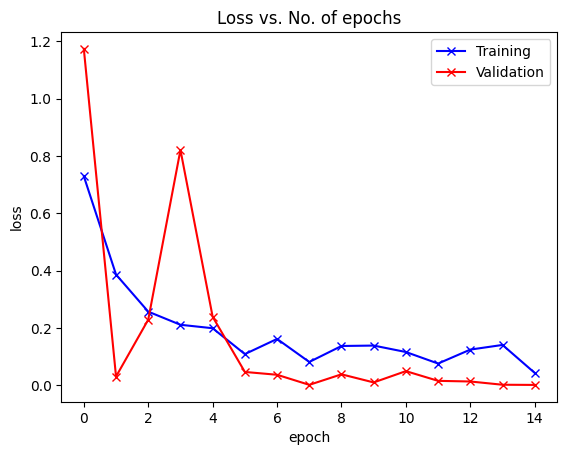

In [34]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

From here on testing happens

In [35]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

def show_predictions(model, device, data_loader, class_names, num_images=5):
    model.eval()  # Set the model to evaluation mode
    images_so_far = 0
    plt.figure(figsize=(15, 15))

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(images.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//5, 5, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[i]]}')
                plt.imshow(TF.to_pil_image(images[i].cpu()))

                if images_so_far == num_images:
                    plt.show()
                    return


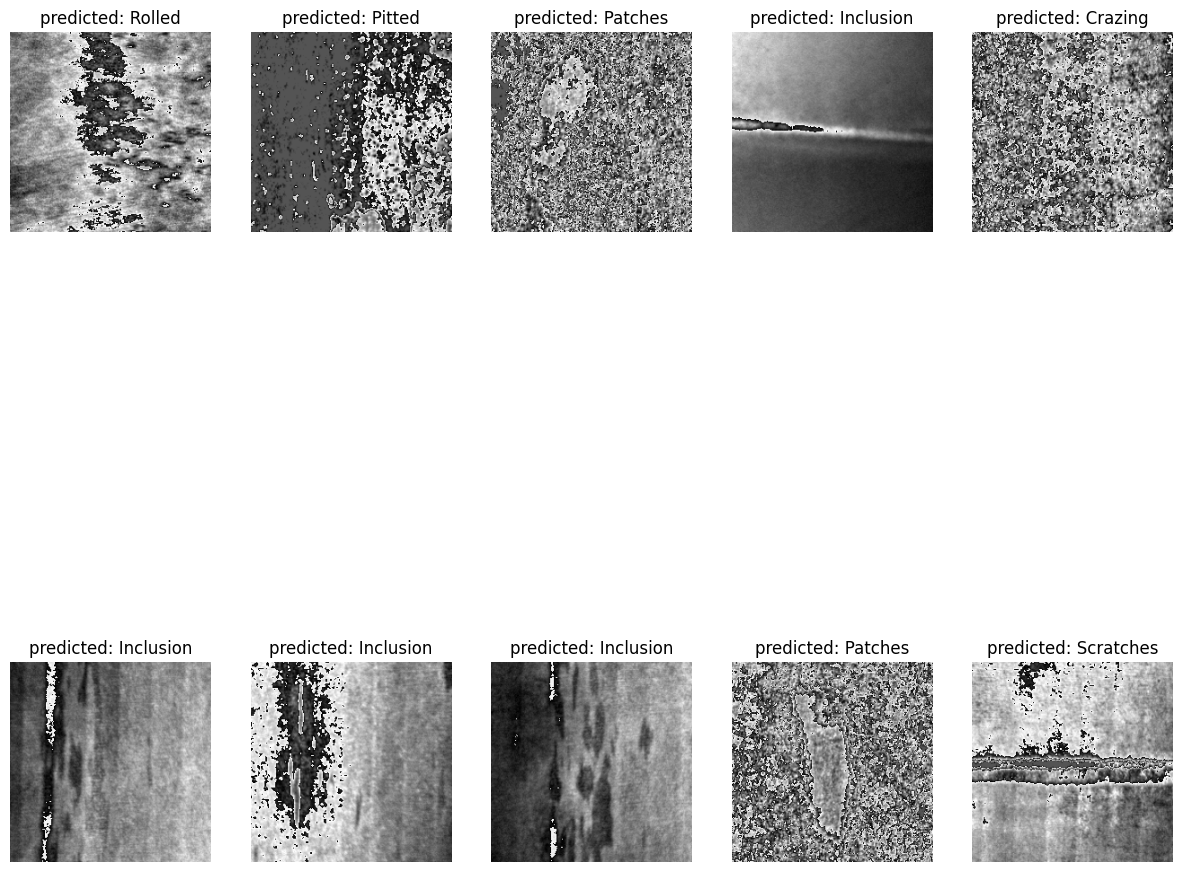

In [36]:
# Assume `model`, `device`, and `test_loader` are already defined
class_names = test_dataset.classes  # This should list out your class names
show_predictions(model, device, test_loader, class_names, num_images=10)


In [37]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

def show_predictions(model, device, data_loader, class_names, num_images=10):
    model.eval()  # Set the model to evaluation mode
    images_so_far = 0
    plt.figure(figsize=(15, 15))  # Set the size of the figure

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(images.size()[0]):
                if images_so_far == num_images:
                    break
                images_so_far += 1
                ax = plt.subplot(num_images // 5, 5, images_so_far)
                ax.axis('off')
                ax.set_title(f'Predicted: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}')
                plt.imshow(TF.to_pil_image(images[i].cpu()))

            if images_so_far == num_images:
                plt.show()
                return


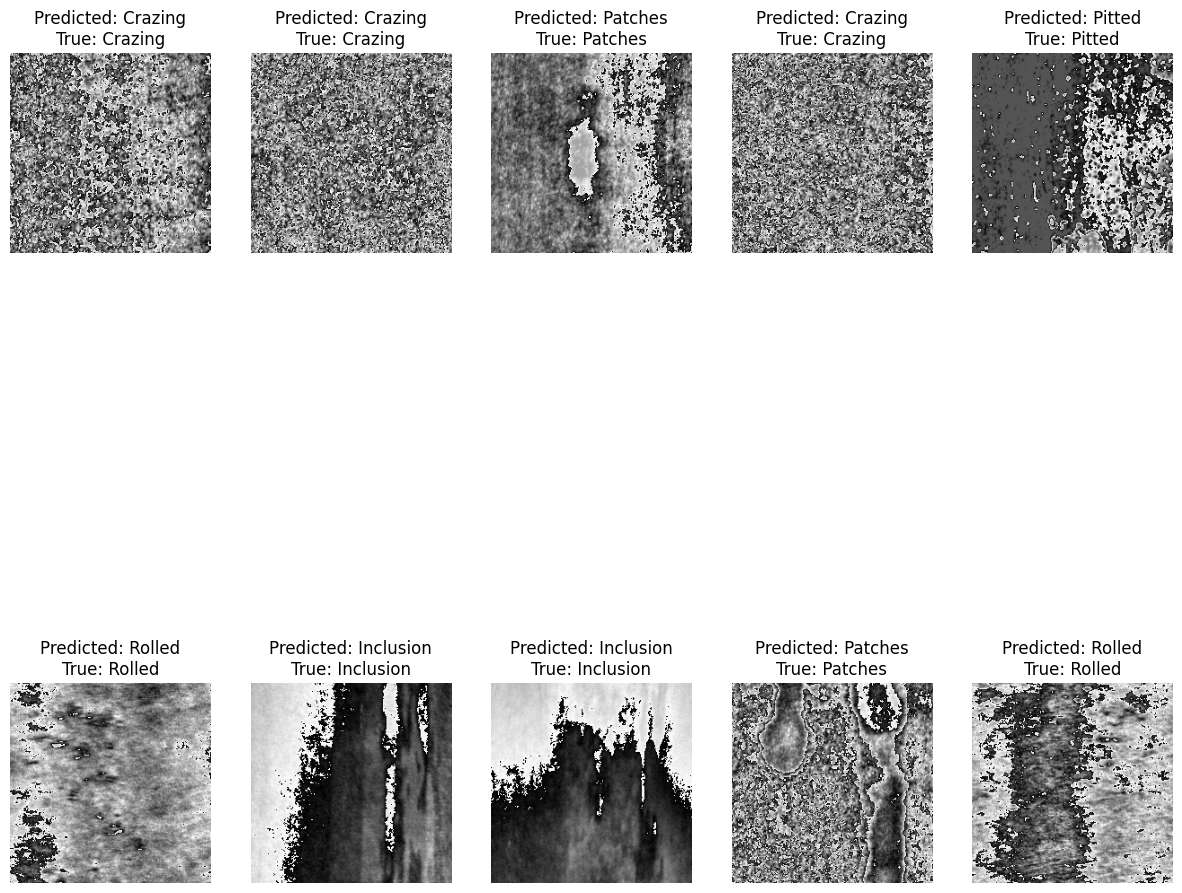

In [38]:
# Assume `model`, `device`, and `test_loader` are already defined
class_names = test_dataset.classes  # This should list out your class names
show_predictions(model, device, test_loader, class_names, num_images=10)


In [39]:
@torch.no_grad()
def test_model(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    accuracy = 100 * correct / total
    return accuracy
# Assuming your model and device are already defined and set up
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Ensure the model is on the correct device

# Run the test to get accuracy
test_accuracy = test_model(model, device, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 95.83%
